In [150]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sn

In [151]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
df = adult.data.features 
y  = adult.data.targets.to_numpy() 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [152]:
# df = pd.read_csv('adult.data')
# df.head()

In [153]:
# df['charges'] = df['charges'].apply(lambda x: 1 if x >= 10000 else 0)
# df

In [154]:
# df['region'].value_counts()

In [155]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [156]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array(['<=50K', '<=50K.', '>50K', '>50K.'], dtype=object),
 array([24720, 12435,  7841,  3846]))

In [157]:
y = list(y)
for i in range(len(y)):
    if y[i] == '<=50K' or y[i] == '<=50K.':
        y[i] = 0
    else:
        y[i] = 1
        
y = np.array(y)
np.unique(y)

array([0, 1])

In [158]:
df['income'] = y
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [159]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace = True)

In [160]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital              0
occupation        1843
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
country            583
income               0
dtype: int64

In [161]:
# code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

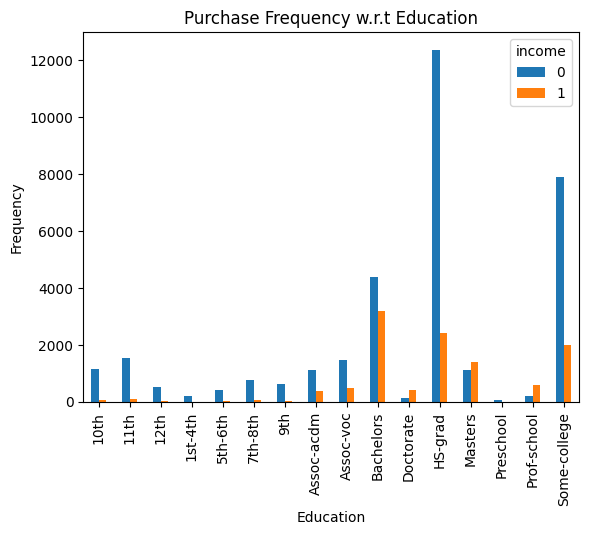

In [162]:
pd.crosstab(df.education,df.income).plot(kind='bar')
plt.title('Purchase Frequency w.r.t Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [163]:
cat_cols = ['workclass', 'education', 'marital', \
            'occupation', 'relationship', 'race', 'sex', 'country']

In [164]:
def one_hot(df, cols): # idk if sklearns one-hot encoder is similar
    """
    df: pandas DataFrame
    param: cols a list of columns to encode
    return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [165]:
def numeric_scaler(df, cols):
    '''
    df: pandas dataframe
    numeric_cols: (array of strings) column names for numeric variables

    no return: does inplace operation
    '''
    df_new = df.copy()
    mmscaler = MinMaxScaler()
    df_new[cols] = mmscaler.fit_transform(df_new[cols])
    return df_new

In [166]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [167]:
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

In [168]:
numeric_all = ['age', 'bmi', 'children', 'charges']
# cat_all = ['sex', 'smoker', 'region']
# df_medical_mm = numeric_scaler(df, numeric_all) # minmax scaling for all numeric columns, so all elements in [0,1]
df_medical_mm_oh = one_hot(df, cat_cols)
df_medical_mm_oh.drop(cat_cols, axis = 1, inplace=True) # drop categories that were used to one hot encode
df_medical_mm_oh = df_medical_mm_oh * 1.0 # make bool true, false into 1.0, 0.0

In [169]:
df_medical_mm_oh.head()

,age,fnlwgt,education-num,capital gain,capital loss,hours per week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
X = df_medical_mm_oh
X['intercept'] = 1.0
X = X.to_numpy() # now (n, d+1) dimensional, log regression in d+1 is affine in d
X.shape

(45222, 106)

In [171]:
X

array([[3.90000e+01, 7.75160e+04, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.00000e+01, 8.33110e+04, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.80000e+01, 2.15646e+05, 9.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [3.80000e+01, 3.74983e+05, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.40000e+01, 8.38910e+04, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [3.50000e+01, 1.82148e+05, 1.30000e+01, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [172]:
def normalize_columns(X):
    # Calculate the L2 norm of each column
    col_norms = np.linalg.norm(X, ord=2, axis=0)
    
    # Find scaling factors where norm > 1
    scaling_factors = np.maximum(col_norms, 1.0)  # Ensures norms <= 1
    
    # Scale columns with their respective factors
    X_normalized = X / scaling_factors
    return X_normalized

In [173]:
X = normalize_columns(X)
X

array([[0.00450039, 0.00167856, 0.00585806, ..., 0.        , 0.        ,
        0.00470246],
       [0.00576973, 0.00180404, 0.00585806, ..., 0.        , 0.        ,
        0.00470246],
       [0.004385  , 0.00466967, 0.00405558, ..., 0.        , 0.        ,
        0.00470246],
       ...,
       [0.004385  , 0.00812   , 0.00585806, ..., 0.        , 0.        ,
        0.00470246],
       [0.00507737, 0.0018166 , 0.00585806, ..., 0.        , 0.        ,
        0.00470246],
       [0.00403881, 0.00394429, 0.00585806, ..., 0.        , 0.        ,
        0.00470246]])

In [174]:
np.linalg.norm(X, ord=2, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [175]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X = normalizer.fit_transform(X)

print(X)

[[0.13191593 0.04920198 0.17171205 ... 0.         0.         0.13783895]
 [0.1989062  0.06219267 0.20195121 ... 0.         0.         0.16211292]
 [0.13781377 0.14676044 0.12746071 ... 0.         0.         0.14779112]
 ...
 [0.16762984 0.31041156 0.22394217 ... 0.         0.         0.17976579]
 [0.12720586 0.04551226 0.14676503 ... 0.         0.         0.11781314]
 [0.11151355 0.10890369 0.16174384 ... 0.         0.         0.12983713]]


In [176]:
np.linalg.norm(X)

212.6546496082341

In [177]:
import math
math.sqrt(X.shape[0])

212.65464960823218

In [178]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

In [179]:
# y = np.where(y == '<=50K', 0, 1)
# y.shape

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=43)
print("Training data x, y shapes", X_train.shape, y_train.shape)
print("Test data x, y shapes", X_test.shape, y_test.shape)

Training data x, y shapes (40699, 106) (40699,)
Test data x, y shapes (4523, 106) (4523,)


In [367]:
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import TensorDataset, DataLoader


from torch.autograd import Function, Variable
from torch.nn.parameter import Parameter

import torch.nn as nn


def dfl_train_model(X_train_tensor, y_train_tensor, theta_init, Lamb, b, c, batch_size=128):
    
    n, d = X_train_tensor.shape[0], X_train_tensor.shape[1]
    epochs = 1000
    
    dataset = TensorDataset(X_train_tensor, y_train_tensor)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    
    optimizer = optim.Adam([theta_init], lr=1e-4)
    # criterion = nn.CrossEntropyLoss()
    


    for epoch in tqdm(range(epochs), desc='Training'):
        epoch_loss = 0.0
        
        for batch_X, batch_y in data_loader:

            newn = batch_y.shape[0]
            # print(batch_y.shape)
        
            o, p = np.identity(newn), -np.identity(newn)
            G = np.concatenate((o, p), axis=0)
            # print(G.shape)

            G_tensor = torch.Tensor(G)

            h_1, h_2 = np.ones(newn), np.zeros(newn)
            h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
            h = np.concatenate((h_1, h_2), axis=0)
            
            k = 1
            gamma_star = k * torch.ones(G.shape[0])
            # print(gamma_star.shape)
        
            y_hat_init = torch.matmul(batch_X, theta_init.float())
            
            Q = c * torch.eye(batch_X.shape[0])

            z_star = torch.matmul(torch.linalg.inv(Q), (y_hat_init.flatten() - (gamma_star @ G_tensor).flatten()))

            pert = torch.dot(b.flatten(), theta_init.flatten())

            y_flt, z_flt = batch_y.flatten(), z_star.flatten()

            obj = - torch.dot(y_flt, z_flt) \
                + pert \
                + (Lamb * (torch.norm(theta_init)**2))                
        
            epoch_loss += obj.item()

            obj.backward()

            optimizer.step()

            optimizer.zero_grad()
            
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], 'f'Loss: {epoch_loss:.4f}')
            
    return theta_init

In [368]:
dqs, accs, cQs_accs, cQs_dQs = {}, {}, {}, {}
preds_list, binary_preds_list = [], []

n, d = X_train.shape[0], X_train.shape[1]
Lamb = 0.0001 * n

for eps_p in [np.inf]:
    y_predicted_list, y_predicted_cls_list = [], [] 
    for c in [0.01]:
        print(f"c = {c}")
        dq_list = []
        for _ in range(1):
            
            X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
            y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

            
            theta_init = torch.randn((d,1), requires_grad=True)
            eta = (c * eps_p) / (4 * math.sqrt(n))
    
            b = np.random.gamma(d, scale=1.0/eta, size=(d,1))
            
            b = b.reshape(1, -1) 
            b = torch.Tensor(b)

            theta_priv = dfl_train_model(X_train_tensor, y_train_tensor, theta_init, Lamb, b, c, batch_size=100)
            
            # Evaluation
            X_test, y_test = X_test[:1000], y_test[:1000]
            
            with torch.no_grad():
                
                
                
                X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
                y_test = np.array(y_test)
                y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
                
                test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
                test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, drop_last=True)
                
                
                acc_list = []
                y_predicted_list = []
                
                for batch_X, batch_y in test_loader:
                
                
                    
                    y_predicted = torch.matmul(batch_X, theta_priv.flatten().float())

                    y_predicted_cls = y_predicted.round()

                    acc = y_predicted_cls.eq(batch_y).sum() / float(batch_y.shape[0])
                    acc_list.append(acc)

                    y_predicted_list.append(y_predicted)
                    y_predicted_cls_list.append(y_predicted_cls)


                print(f'accuracy: {acc.item() / y_test_tensor.shape[0]:.4f}')

c = 0.01


Training:   1%|▎                              | 11/1000 [00:02<03:07,  5.29it/s]

Epoch [10/1000], Loss: -1460726.3789


Training:   2%|▋                              | 21/1000 [00:04<03:03,  5.35it/s]

Epoch [20/1000], Loss: -2577997.5273


Training:   3%|▉                              | 31/1000 [00:05<03:04,  5.26it/s]

Epoch [30/1000], Loss: -3665575.0620


Training:   4%|█▎                             | 41/1000 [00:07<03:06,  5.15it/s]

Epoch [40/1000], Loss: -4734306.4336


Training:   5%|█▌                             | 51/1000 [00:09<03:04,  5.13it/s]

Epoch [50/1000], Loss: -5768620.7803


Training:   6%|█▉                             | 61/1000 [00:11<02:55,  5.36it/s]

Epoch [60/1000], Loss: -6791900.5430


Training:   7%|██▏                            | 71/1000 [00:13<02:57,  5.23it/s]

Epoch [70/1000], Loss: -7792231.3115


Training:   8%|██▌                            | 81/1000 [00:15<02:56,  5.20it/s]

Epoch [80/1000], Loss: -8759263.6133


Training:   9%|██▊                            | 90/1000 [00:17<02:50,  5.32it/s]

Epoch [90/1000], Loss: -9713176.9053


Training:  10%|███                           | 101/1000 [00:19<02:45,  5.42it/s]

Epoch [100/1000], Loss: -10653805.2383


Training:  11%|███▎                          | 111/1000 [00:21<02:48,  5.26it/s]

Epoch [110/1000], Loss: -11568103.9736


Training:  12%|███▋                          | 121/1000 [00:23<02:42,  5.39it/s]

Epoch [120/1000], Loss: -12470598.2070


Training:  13%|███▉                          | 131/1000 [00:25<02:40,  5.41it/s]

Epoch [130/1000], Loss: -13340860.0635


Training:  14%|████▏                         | 140/1000 [00:27<03:31,  4.07it/s]

Epoch [140/1000], Loss: -14205012.1680


Training:  15%|████▌                         | 151/1000 [00:29<02:39,  5.31it/s]

Epoch [150/1000], Loss: -15062492.4648


Training:  16%|████▊                         | 161/1000 [00:31<02:36,  5.37it/s]

Epoch [160/1000], Loss: -15878855.6641


Training:  17%|█████                         | 170/1000 [00:32<02:33,  5.39it/s]

Epoch [170/1000], Loss: -16700841.2871


Training:  18%|█████▍                        | 181/1000 [00:35<02:41,  5.08it/s]

Epoch [180/1000], Loss: -17501003.3379


Training:  19%|█████▋                        | 190/1000 [00:36<02:31,  5.33it/s]

Epoch [190/1000], Loss: -18300578.6328


Training:  20%|██████                        | 200/1000 [00:38<02:31,  5.30it/s]

Epoch [200/1000], Loss: -19052188.6035


Training:  21%|██████▎                       | 210/1000 [00:40<02:28,  5.31it/s]

Epoch [210/1000], Loss: -19823521.7051


Training:  22%|██████▋                       | 221/1000 [00:43<02:29,  5.21it/s]

Epoch [220/1000], Loss: -20544027.1270


Training:  23%|██████▉                       | 230/1000 [00:44<02:29,  5.15it/s]

Epoch [230/1000], Loss: -21257290.7383


Training:  24%|███████▏                      | 240/1000 [00:46<02:25,  5.21it/s]

Epoch [240/1000], Loss: -22014393.7129


Training:  25%|███████▌                      | 250/1000 [00:48<02:27,  5.08it/s]

Epoch [250/1000], Loss: -22707747.5215


Training:  26%|███████▊                      | 261/1000 [00:50<02:20,  5.27it/s]

Epoch [260/1000], Loss: -23382635.4102


Training:  27%|████████▏                     | 271/1000 [00:52<02:19,  5.22it/s]

Epoch [270/1000], Loss: -24068531.9141


Training:  28%|████████▍                     | 281/1000 [00:54<02:23,  5.00it/s]

Epoch [280/1000], Loss: -24733781.4316


Training:  29%|████████▋                     | 291/1000 [00:56<02:12,  5.35it/s]

Epoch [290/1000], Loss: -25360980.9297


Training:  30%|█████████                     | 301/1000 [00:58<02:16,  5.11it/s]

Epoch [300/1000], Loss: -26003371.3750


Training:  31%|█████████▎                    | 311/1000 [01:00<02:08,  5.36it/s]

Epoch [310/1000], Loss: -26639056.4707


Training:  32%|█████████▋                    | 321/1000 [01:02<02:09,  5.25it/s]

Epoch [320/1000], Loss: -27234323.5156


Training:  33%|█████████▉                    | 331/1000 [01:04<02:06,  5.28it/s]

Epoch [330/1000], Loss: -27834436.0859


Training:  34%|██████████▏                   | 341/1000 [01:06<02:05,  5.27it/s]

Epoch [340/1000], Loss: -28432588.1348


Training:  35%|██████████▌                   | 351/1000 [01:08<02:03,  5.27it/s]

Epoch [350/1000], Loss: -29000603.0098


Training:  36%|██████████▊                   | 361/1000 [01:10<01:58,  5.37it/s]

Epoch [360/1000], Loss: -29565969.8828


Training:  37%|███████████▏                  | 371/1000 [01:12<01:58,  5.30it/s]

Epoch [370/1000], Loss: -30137143.0234


Training:  38%|███████████▍                  | 381/1000 [01:14<01:57,  5.26it/s]

Epoch [380/1000], Loss: -30668390.4688


Training:  39%|███████████▋                  | 390/1000 [01:15<02:00,  5.05it/s]

Epoch [390/1000], Loss: -31235048.0020


Training:  40%|████████████                  | 401/1000 [01:17<01:53,  5.30it/s]

Epoch [400/1000], Loss: -31741929.0547


Training:  41%|████████████▎                 | 411/1000 [01:19<01:48,  5.44it/s]

Epoch [410/1000], Loss: -32250536.5566


Training:  42%|████████████▋                 | 421/1000 [01:21<01:46,  5.41it/s]

Epoch [420/1000], Loss: -32791302.6836


Training:  43%|████████████▉                 | 431/1000 [01:23<01:53,  5.00it/s]

Epoch [430/1000], Loss: -33239090.4844


Training:  44%|█████████████▏                | 440/1000 [01:25<01:50,  5.08it/s]

Epoch [440/1000], Loss: -33752544.5332


Training:  45%|█████████████▌                | 451/1000 [01:27<01:48,  5.07it/s]

Epoch [450/1000], Loss: -34231348.3477


Training:  46%|█████████████▊                | 460/1000 [01:29<01:44,  5.18it/s]

Epoch [460/1000], Loss: -34716000.5938


Training:  47%|██████████████▏               | 471/1000 [01:31<01:39,  5.30it/s]

Epoch [470/1000], Loss: -35187625.3008


Training:  48%|██████████████▍               | 481/1000 [01:34<01:57,  4.42it/s]

Epoch [480/1000], Loss: -35626158.2129


Training:  49%|██████████████▋               | 491/1000 [01:36<01:41,  5.01it/s]

Epoch [490/1000], Loss: -36041282.7695


Training:  50%|███████████████               | 500/1000 [01:38<01:38,  5.08it/s]

Epoch [500/1000], Loss: -36517455.4453


Training:  51%|███████████████▎              | 511/1000 [01:40<01:33,  5.22it/s]

Epoch [510/1000], Loss: -36878745.5625


Training:  52%|███████████████▋              | 521/1000 [01:42<01:34,  5.08it/s]

Epoch [520/1000], Loss: -37337189.9766


Training:  53%|███████████████▉              | 530/1000 [01:44<02:04,  3.77it/s]

Epoch [530/1000], Loss: -37756789.2383


Training:  54%|████████████████▏             | 540/1000 [01:46<02:10,  3.53it/s]

Epoch [540/1000], Loss: -38131385.3867


Training:  55%|████████████████▌             | 551/1000 [01:49<01:37,  4.61it/s]

Epoch [550/1000], Loss: -38517098.5469


Training:  56%|████████████████▊             | 560/1000 [01:52<03:01,  2.43it/s]

Epoch [560/1000], Loss: -38903164.6016


Training:  57%|█████████████████▏            | 571/1000 [01:55<01:33,  4.57it/s]

Epoch [570/1000], Loss: -39292484.3320


Training:  58%|█████████████████▍            | 580/1000 [01:56<01:27,  4.78it/s]

Epoch [580/1000], Loss: -39654000.3789


Training:  59%|█████████████████▋            | 591/1000 [01:59<01:26,  4.74it/s]

Epoch [590/1000], Loss: -40024346.9961


Training:  60%|██████████████████            | 601/1000 [02:01<01:14,  5.33it/s]

Epoch [600/1000], Loss: -40372865.1172


Training:  61%|██████████████████▎           | 611/1000 [02:03<01:11,  5.46it/s]

Epoch [610/1000], Loss: -40701788.9492


Training:  62%|██████████████████▋           | 621/1000 [02:05<01:08,  5.52it/s]

Epoch [620/1000], Loss: -41021601.3828


Training:  63%|██████████████████▉           | 631/1000 [02:07<01:06,  5.52it/s]

Epoch [630/1000], Loss: -41354425.8398


Training:  64%|███████████████████▏          | 641/1000 [02:08<01:05,  5.51it/s]

Epoch [640/1000], Loss: -41720012.9766


Training:  65%|███████████████████▌          | 651/1000 [02:11<01:13,  4.76it/s]

Epoch [650/1000], Loss: -41998053.5859


Training:  66%|███████████████████▊          | 660/1000 [02:12<01:04,  5.28it/s]

Epoch [660/1000], Loss: -42325026.9922


Training:  67%|████████████████████▏         | 671/1000 [02:14<00:59,  5.51it/s]

Epoch [670/1000], Loss: -42613637.5195


Training:  68%|████████████████████▍         | 681/1000 [02:16<01:00,  5.29it/s]

Epoch [680/1000], Loss: -42942376.5508


Training:  69%|████████████████████▋         | 691/1000 [02:18<00:56,  5.48it/s]

Epoch [690/1000], Loss: -43238775.7852


Training:  70%|█████████████████████         | 701/1000 [02:20<00:55,  5.42it/s]

Epoch [700/1000], Loss: -43493202.7383


Training:  71%|█████████████████████▎        | 711/1000 [02:22<00:52,  5.52it/s]

Epoch [710/1000], Loss: -43700253.4414


Training:  72%|█████████████████████▌        | 720/1000 [02:23<00:52,  5.38it/s]

Epoch [720/1000], Loss: -44072711.1992


Training:  73%|█████████████████████▉        | 731/1000 [02:25<00:48,  5.50it/s]

Epoch [730/1000], Loss: -44254642.3867


Training:  74%|██████████████████████▏       | 741/1000 [02:27<00:47,  5.50it/s]

Epoch [740/1000], Loss: -44546237.2305


Training:  75%|██████████████████████▌       | 751/1000 [02:29<00:45,  5.47it/s]

Epoch [750/1000], Loss: -44764433.4297


Training:  76%|██████████████████████▊       | 761/1000 [02:31<00:43,  5.52it/s]

Epoch [760/1000], Loss: -45002229.3789


Training:  77%|███████████████████████▏      | 771/1000 [02:33<00:41,  5.54it/s]

Epoch [770/1000], Loss: -45224134.7227


Training:  78%|███████████████████████▍      | 781/1000 [02:34<00:39,  5.53it/s]

Epoch [780/1000], Loss: -45480334.3203


Training:  79%|███████████████████████▋      | 791/1000 [02:36<00:37,  5.55it/s]

Epoch [790/1000], Loss: -45778616.3984


Training:  80%|████████████████████████      | 801/1000 [02:38<00:35,  5.54it/s]

Epoch [800/1000], Loss: -45853625.9141


Training:  81%|████████████████████████▎     | 811/1000 [02:40<00:35,  5.39it/s]

Epoch [810/1000], Loss: -46150751.1797


Training:  82%|████████████████████████▋     | 821/1000 [02:42<00:33,  5.41it/s]

Epoch [820/1000], Loss: -46359042.9766


Training:  83%|████████████████████████▉     | 831/1000 [02:44<00:30,  5.46it/s]

Epoch [830/1000], Loss: -46506964.1562


Training:  84%|█████████████████████████▏    | 841/1000 [02:45<00:28,  5.54it/s]

Epoch [840/1000], Loss: -46696470.6328


Training:  85%|█████████████████████████▌    | 851/1000 [02:47<00:26,  5.56it/s]

Epoch [850/1000], Loss: -46892356.9531


Training:  86%|█████████████████████████▊    | 861/1000 [02:49<00:25,  5.56it/s]

Epoch [860/1000], Loss: -47044815.5703


Training:  87%|██████████████████████████▏   | 871/1000 [02:51<00:23,  5.51it/s]

Epoch [870/1000], Loss: -47233888.5234


Training:  88%|██████████████████████████▍   | 881/1000 [02:53<00:21,  5.52it/s]

Epoch [880/1000], Loss: -47466563.3672


Training:  89%|██████████████████████████▋   | 891/1000 [02:54<00:19,  5.52it/s]

Epoch [890/1000], Loss: -47568067.2812


Training:  90%|███████████████████████████   | 901/1000 [02:56<00:17,  5.54it/s]

Epoch [900/1000], Loss: -47765150.6172


Training:  91%|███████████████████████████▎  | 911/1000 [02:58<00:16,  5.52it/s]

Epoch [910/1000], Loss: -47873188.6641


Training:  92%|███████████████████████████▋  | 921/1000 [03:00<00:14,  5.57it/s]

Epoch [920/1000], Loss: -48047371.8203


Training:  93%|███████████████████████████▉  | 931/1000 [03:02<00:12,  5.47it/s]

Epoch [930/1000], Loss: -48202227.8750


Training:  94%|████████████████████████████▏ | 941/1000 [03:04<00:10,  5.56it/s]

Epoch [940/1000], Loss: -48340567.3516


Training:  95%|████████████████████████████▌ | 951/1000 [03:05<00:08,  5.56it/s]

Epoch [950/1000], Loss: -48424758.8516


Training:  96%|████████████████████████████▊ | 961/1000 [03:07<00:07,  5.55it/s]

Epoch [960/1000], Loss: -48590699.8594


Training:  97%|█████████████████████████████▏| 971/1000 [03:09<00:05,  5.56it/s]

Epoch [970/1000], Loss: -48677116.2031


Training:  98%|█████████████████████████████▍| 981/1000 [03:11<00:03,  5.51it/s]

Epoch [980/1000], Loss: -48899473.5703


Training:  99%|█████████████████████████████▋| 991/1000 [03:13<00:01,  5.43it/s]

Epoch [990/1000], Loss: -48992923.7812


Training: 100%|█████████████████████████████| 1000/1000 [03:14<00:00,  5.13it/s]

Epoch [1000/1000], Loss: -49039034.4531
accuracy: 0.0000


In [369]:
from scipy.sparse import csr_matrix
import gurobipy as gp
from gurobipy import GRB


def run_opt(y_hat):

    newn = y_hat.shape[0]  # Number of variables (columns in G)
    print(newn)

    model = gp.Model("matrix_constraints")

    z = model.addMVar(newn, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="z")  # MVar for vectorized variables
    
    # Budget constraint
    B = newn // 2 

    model.addConstr(z.sum() <= B, name="sum_constraint")
    
    
    o, p = np.identity(newn), -np.identity(newn)
    G = np.concatenate((o, p), axis=0)

    h_1, h_2 = np.ones(newn), np.zeros(newn)
    h_1, h_2 = h_1.reshape(-1,1), h_2.reshape(-1,1)
    h = np.concatenate((h_1, h_2), axis=0)


    print(G.shape)
    print(z.shape)
    print(h.shape)
    
    z = z.reshape(-1, 1)
    
    model.addConstr(G @ z <= h)

    y_hat = y_hat.flatten()
    
    dot_product = gp.quicksum(y_hat[i] * z[i] for i in range(len(y_hat)))
    

    model.setObjective(dot_product, GRB.MAXIMIZE)

    model.optimize()

    if model.status == GRB.OPTIMAL:
        z_star_test = z.X
        
    return z_star_test

In [370]:
from itertools import chain
y_pred = list(chain(*y_predicted_cls_list))
y_pred = np.array(y_pred)
y_pred.shape

(1000,)

In [371]:
sum(y_pred)

64435.0

In [372]:
z_star_test = run_opt(np.array(y_pred))

1000
(2000, 1000)
(1000,)
(2000, 1)
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2001 rows, 1000 columns and 3000 nonzeros
Model fingerprint: 0xa9b4450b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+02]
Presolve removed 2000 rows and 889 columns
Presolve time: 0.00s
Presolved: 1 rows, 111 columns, 111 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.9500000e+04   2.495000e+02   0.000000e+00      0s
       1    4.2007000e+04   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.200700000e+04


In [373]:
# print(z_star_test)

In [374]:
# print(y_test_tensor.numpy())

In [375]:
y_test_tensor.shape

torch.Size([1000, 1])

In [376]:
z_star_test.shape

(1000, 1)

In [377]:
# (z_star_test.flatten() - y_test_tensor.flatten().numpy()).shape

In [378]:
dq = np.dot(z_star_test.flatten(), y_test)
dq

189.0

In [379]:
sum(y_test)

240